In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# to save the model
import joblib

# to build the model
from sklearn.linear_model import Lasso
from sklearn import datasets, ensemble

# to evaluate the model
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, r2_score

# for Cross-Val
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
# load the train and test set with the engineered variables

X_train = pd.read_csv('preprocessed_data/xtrain.csv')
X_test = pd.read_csv('preprocessed_data/xtest.csv')

X_train.head()

index  super_hero_group  tracking  place  tracking_times  crystal_type  \
0  0.125000          0.428571  0.954742    0.0             0.0      0.642857   
1  0.493421          0.285714  0.021300    0.0             0.0      0.964286   
2  0.361842          0.857143  0.127477    0.0             0.0      0.678571   
3  0.105263          0.428571  0.121242    0.0             0.0      0.000000   
4  0.032895          0.714286  0.127832    1.0             0.0      0.642857   

   Unnamed: 7  human_behavior_report  human_measure  crystal_weight  \
0    0.473684               1.000000       0.490741        0.772396   
1    0.842105               0.000000       0.518519        0.698589   
2    0.526316               0.666667       0.425926        0.709611   
3    0.421053               0.333333       0.518519        0.775316   
4    0.578947               1.000000       0.425926        0.554699   

   expected_factor_x  previous_factor_x  first_factor_x  \
0           0.297297           0.356616        0.440217   
1           0.635135           0.548545        0.635870   
2           0.364865           0.494226        0.586957   
3           0.425676           0.532853        0.625000   
4           0.412162           0.515350        0.621196   

   expected_final_factor_x  final_factor_x  previous_adamantium  Unnamed: 17  \
0                 0.245455        0.558046             0.045111     0.440217   
1                 0.590909        0.709157             0.473206     0.635870   
2                 0.645455        0.730472             0.458068     0.586957   
3                 0.509091        0.743229             0.061762     0.625000   
4                 0.454545        0.670621             0.029216     0.621196   

   etherium_before_start  chemical_x  raw_kryptonite     argon  pure_seastone  \
0               0.384121    0.754144        0.100159  0.163799       0.579159   
1               0.422208    0.810842        0.100159  0.140086       0.745054   
2               0.384121    0.587025        0.100159  0.000000       0.759387   
3               0.384121    0.658251        0.100159  0.000000       0.745955   
4               0.384121    0.795842        0.035240  0.127913       0.644752   

   crystal_supergroup     Cycle    groups  diff_subprocess1  diff_expected  \
0                 0.0  0.666667  0.716216          0.257143       0.042747   
1                 1.0  0.333333  0.878378          0.352381       0.035039   
2                 0.0  0.333333  0.540541          0.104762       0.018220   
3                 0.0  0.666667  0.000000          0.152381       0.031535   
4                 0.0  0.666667  0.837838          0.333333       0.025929   

   diff_process  year_when  month_when  day_when  \
0      0.479339        0.5    0.818182  0.700000   
1      0.404959        0.0    0.454545  0.966667   
2      0.148760        0.5    0.545455  0.966667   
3      0.190083        0.5    0.818182  0.200000   
4      0.388430        0.5    0.000000  0.233333   

   year_start_critical_subprocess1  month_start_critical_subprocess1  \
0                         0.500000                          0.818182   
1                         0.000000                          0.454545   
2                         0.363801                          0.480837   
3                         0.363801                          0.480837   
4                         0.500000                          0.000000   

   day_start_critical_subprocess1  hour_start_critical_subprocess1  \
0                        0.700000                         0.347826   
1                        0.966667                         0.086957   
2                        0.474836                         0.491857   
3                        0.474836                         0.491857   
4                        0.233333                         0.391304   

   minute_start_critical_subprocess1  second_start_critical_subprocess1  \
0                           0.406780                            

In [3]:
# load the target (remember that the target is log transformed)
y_train = pd.read_csv('preprocessed_data/ytrain.csv')
y_test = pd.read_csv('preprocessed_data/ytest.csv')

y_train.head()

target
0  3.547049
1  4.852030
2  4.795689
3  2.982660
4  2.214880

In [4]:
# load the pre-selected features
# ==============================

# we selected the features in the previous notebook (step 3)

features = pd.read_csv('preprocessed_data/selected_features.csv')
features = features['0'].to_list() 

# display final feature set
features

['index',
 'super_hero_group',
 'tracking',
 'place',
 'crystal_type',
 'human_behavior_report',
 'human_measure',
 'argon',
 'crystal_supergroup',
 'Cycle',
 'groups',
 'year_when',
 'day_when',
 'year_start_critical_subprocess1',
 'month_start_critical_subprocess1',
 'minute_start_critical_subprocess1',
 'year_opened',
 'month_opened',
 'hour_opened',
 'minute_opened',
 'etherium_before_start_na',
 'argon_na',
 'pure_seastone_na',
 'diff_subprocess1_na',
 'year_reported_on_tower_na',
 'year_opened_na']

In [5]:
# reduce the train and test set to the selected features

X_train = X_train[features]
X_test = X_test[features]

# Regularised linear regression: Lasso

In [6]:
# set up the model
# remember to set the random_state / seed

lin_model = Lasso(alpha=0.001, random_state=0)

# train the model

lin_model.fit(X_train, y_train)

Lasso(alpha=0.001, random_state=0)

In [7]:
# evaluate the model:

# remember that we log transformed the target

# In order to get the true performance of the Lasso
# we need to transform both the target and the predictions
# back to the original target values

# We will evaluate performance using the mean squared error and
# the root of the mean squared error and r2

# make predictions for train set
pred = lin_model.predict(X_train)

# determine mse, rmse and r2
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred), squared=False))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = lin_model.predict(X_test)

# determine mse, rmse and r2
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred), squared=False))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()


train mse: 1431
train rmse: 37
train r2: 0.5530172040993442

test mse: 1598
test rmse: 39
test r2: 0.5256269624393355



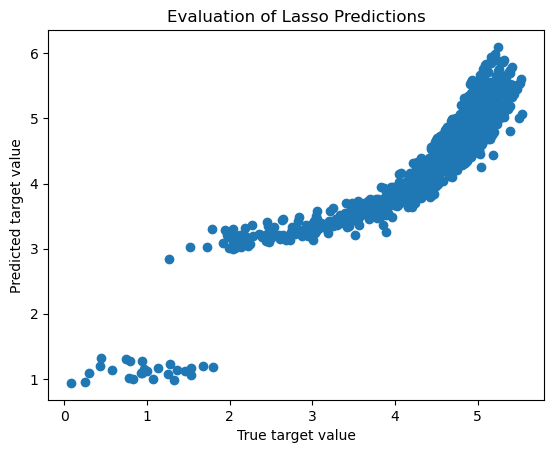

In [8]:
# show real value vs. predicted as plot
plt.scatter(y_test, pred)
plt.xlabel('True target value')
plt.ylabel('Predicted target value')
plt.title('Evaluation of Lasso Predictions')
plt.show()

We can see that Lasso performs really poorly with an R2 just above 0.5 and in the plot you can clearly see that this linear model doesn't capture the highly nonlinear pattern in the data. Therefore we try a nonlinear model: Gradient boosting.

# GradientBoosting

We first use the default parameters and will later do Cross-Validation together with Hyperparameter tuning to find the best parameter set.

In [9]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
    "verbose": 5
}

y_train = y_train.values.ravel()

In [10]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

      Iter       Train Loss   Remaining Time 
         1           0.8759           14.23s
         2           0.8594           11.49s
         3           0.8431           10.25s
         4           0.8272            9.60s
         5           0.8116            9.21s
         6           0.7963           10.64s
         7           0.7813           12.79s
         8           0.7666           13.04s
         9           0.7522           13.83s
        10           0.7381           13.69s
        11           0.7242           13.40s
        12           0.7106           13.26s
        13           0.6973           13.46s
        14           0.6843           13.55s
        15           0.6715           13.25s
        16           0.6590           12.88s
        17           0.6467           12.79s
        18           0.6346           12.49s
        19           0.6228           12.24s
        20           0.6112           12.09s
        21           0.5999           12.48s
        2

In [11]:
# evaluate the model:

# remember that we log transformed the target

# In order to get the true performance of the Gradient Boosting
# we need to transform both the target and the predictions
# back to the original target values

# We will evaluate performance using the mean squared error and
# the root of the mean squared error and r2

# make predictions for train set
y_pred_train = reg.predict(X_train)

# determine mse, rmse and r2
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(y_pred_train)))))
print('train rmse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(y_pred_train), squared=False))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(y_pred_train))))
print()

# make predictions for test set
y_pred_test = reg.predict(X_test)

# determine mse, rmse and r2
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(y_pred_test)))))
print('test rmse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(y_pred_test), squared=False))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(y_pred_test))))
print()


train mse: 157
train rmse: 12
train r2: 0.9507978785233118

test mse: 162
test rmse: 12
test r2: 0.9518584998003602



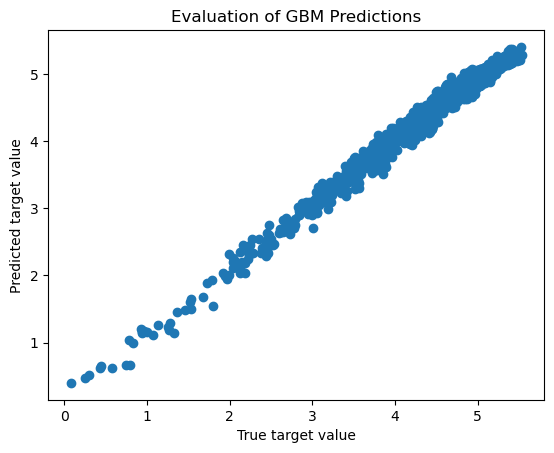

In [12]:
# show real value vs. predicted as plot
plt.scatter(y_test, y_pred_test)
plt.xlabel('True target value')
plt.ylabel('Predicted target value')
plt.title('Evaluation of GBM Predictions')
plt.show()

The R2 score looks way better compared to Lasso! Also the MSE and RMSE improved a lot.

# Cross-Validation & Hyperparameter tuning

In [13]:
# Cross Validation (attention the MSE and RMSE are lower than above because they are log-transformed)
nr_fold = 5
reg = ensemble.GradientBoostingRegressor(**params)
scoring_measures = {"r2": "r2", "mse": "neg_mean_squared_error"}
cross_val = cross_validate(estimator=reg, X=X_train, y=y_train, cv=nr_fold, scoring=scoring_measures, return_train_score=True)
scores_df = pd.DataFrame.from_dict(cross_val)


      Iter       Train Loss   Remaining Time 
         1           0.8666            7.92s
         2           0.8502            7.67s
         3           0.8341            7.99s
         4           0.8184            7.56s
         5           0.8029            7.28s
         6           0.7878            7.11s
         7           0.7729            6.99s
         8           0.7584            6.91s
         9           0.7442            6.83s
        10           0.7302            6.75s
        11           0.7165            6.69s
        12           0.7031            6.65s
        13           0.6899            6.61s
        14           0.6770            6.65s
        15           0.6644            7.05s
        16           0.6520            7.02s
        17           0.6398            7.56s
        18           0.6279            7.49s
        19           0.6162            7.46s
        20           0.6048            7.41s
        21           0.5935            7.58s
        2

In [14]:
scores_df

fit_time  score_time   test_r2  train_r2  test_mse  train_mse
0   9.796980    0.060678  0.983268  0.984247 -0.015577  -0.013915
1  10.287200    0.036833  0.982235  0.984054 -0.016005  -0.014202
2   7.897477    0.018951  0.981653  0.984256 -0.015511  -0.014238
3  10.799702    0.020557  0.982711  0.984494 -0.015188  -0.013900
4   9.559273    0.018291  0.982814  0.984198 -0.015573  -0.014055

In [15]:
# MSE from cross val:
print('Mean mse-score of training scores in cross validation: ' + str(round(abs(scores_df['train_mse'].mean()), 3)))
print('Mean mse-score of test scores in cross validation: ' + str(round(abs(scores_df['test_mse'].mean()), 3)))

# r2 score from cross val:
print('Mean r2-score of training scores in cross validation: ' + str(round(abs(scores_df['train_r2'].mean()), 3)))
print('Mean r2-score of test scores in cross validation: ' + str(round(abs(scores_df['test_r2'].mean()), 3)))


Mean mse-score of training scores in cross validation: 0.014
Mean mse-score of test scores in cross validation: 0.016
Mean r2-score of training scores in cross validation: 0.984
Mean r2-score of test scores in cross validation: 0.983


In [16]:
# Random search
parameters = {
    "n_estimators":[100, 300, 500],
    "max_depth":[2,4,6],
    "min_samples_split":[5, 10],
    "learning_rate":[0.1, 0.01, 0.001],
    "loss": ["squared_error"]
}


hyperparam_tuning = GridSearchCV(estimator=reg, param_grid=parameters, scoring='r2', cv=nr_fold, return_train_score=True) 
hyperparam_tuning.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.7373            0.78s
         2           0.6181            0.82s
         3           0.5194            0.82s
         4           0.4377            0.77s
         5           0.3706            0.78s
         6           0.3145            0.78s
         7           0.2690            0.77s
         8           0.2309            0.75s
         9           0.1989            0.88s
        10           0.1729            0.85s
        11           0.1507            0.83s
        12           0.1325            0.80s
        13           0.1173            0.77s
        14           0.1046            0.75s
        15           0.0940            0.73s
        16           0.0852            0.71s
        17           0.0777            0.70s
        18           0.0714            0.68s
        19           0.0662            0.66s
        20           0.0616            0.65s
        21           0.0576            0.66s
        2

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(learning_rate=0.01,
                                                 max_depth=4,
                                                 min_samples_split=5,
                                                 n_estimators=500, verbose=5),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'loss': ['squared_error'], 'max_depth': [2, 4, 6],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 300, 500]},
             return_train_score=True, scoring='r2')

In [17]:
# summarize the best score and configuration
print("Best: %f using %s" % (hyperparam_tuning.best_score_, hyperparam_tuning.best_params_))

# summarize all scores that were evaluated
means = hyperparam_tuning.cv_results_['mean_test_score']
stds = hyperparam_tuning.cv_results_['std_test_score']
params = hyperparam_tuning.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.999415 using {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 500}
0.979322 (0.000489) with: {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 2, 'min_samples_split': 5, 'n_estimators': 100}
0.993647 (0.000165) with: {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 2, 'min_samples_split': 5, 'n_estimators': 300}
0.997230 (0.000113) with: {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 2, 'min_samples_split': 5, 'n_estimators': 500}
0.979322 (0.000489) with: {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 2, 'min_samples_split': 10, 'n_estimators': 100}
0.993647 (0.000165) with: {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 2, 'min_samples_split': 10, 'n_estimators': 300}
0.997231 (0.000115) with: {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 2, 'min_samples_split': 10, 'n_estimators': 500}
0.994424 (0.000236) with: {'learning_rate': 0.1, 'loss': 

We improved the model performance substantially with the new parameter set!

In [18]:
final_params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.1,
    "loss": "squared_error",
    "verbose": 5
}

reg = ensemble.GradientBoostingRegressor(**final_params)
reg.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.7314            9.35s
         2           0.6004            9.18s
         3           0.4940            8.72s
         4           0.4076            9.36s
         5           0.3373            9.94s
         6           0.2801           10.23s
         7           0.2337           11.41s
         8           0.1959           12.53s
         9           0.1652           15.57s
        10           0.1403           14.76s
        11           0.1199           14.22s
        12           0.1033           13.65s
        13           0.0897           13.28s
        14           0.0786           13.89s
        15           0.0693           15.07s
        16           0.0619           14.66s
        17           0.0558           14.43s
        18           0.0506           14.13s
        19           0.0463           13.76s
        20           0.0428           13.42s
        21           0.0397           13.28s
        2

GradientBoostingRegressor(max_depth=4, min_samples_split=5, n_estimators=500,
                          verbose=5)

# Feature Importance

In [19]:
reg.feature_importances_

array([9.56334214e-01, 1.23721862e-04, 1.34030823e-03, 5.65891821e-04,
       2.04284912e-04, 2.33352277e-06, 2.03786208e-05, 1.65653301e-05,
       3.99092233e-05, 1.39719245e-03, 2.83570506e-02, 2.02338780e-03,
       5.43668238e-03, 1.14960426e-05, 2.95318310e-04, 3.82582459e-05,
       8.15089510e-04, 2.46865166e-03, 6.47155017e-06, 7.34423343e-06,
       6.90559902e-05, 3.50370377e-04, 1.13913375e-06, 6.66142280e-07,
       3.93621486e-06, 7.02815930e-05])

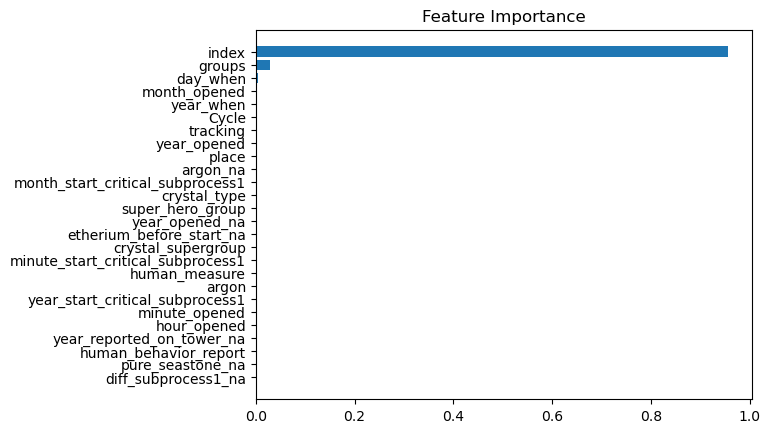

In [20]:
# Plot feature importance
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title('Feature Importance')
plt.show()

As expected the index and the groups variable are the most important, beacuse the target increases with increasing index